## Install and load packages

In [1]:
# install.packages("devtools")
# devtools::install_github("langcog/wordbankr")
library("dplyr")
library("wordbankr")
library("stringr")
library("ggplot2")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
ls("package:wordbankr")

[1] "fit_aoa"                 "get_administration_data"
[3] "get_crossling_data"      "get_crossling_items"    
[5] "get_instrument_data"     "get_instruments"        
[7] "get_item_data"           "get_source_data"        
[9] "summarise_items"

In [3]:
admins <- 
  get_administration_data() %>%
  select(data_id, age, language, form)

items <- 
  get_item_data() %>%
  mutate(num_item_id = as.numeric(substr(item_id, 6, nchar(item_id))),
         definition = tolower(definition))

words <- 
  items %>%
  filter(type == "word", !is.na(uni_lemma), form == "WG")

In [4]:
unique(items$language)

[1] "Croatian"               "German"                 "Russian"               
 [4] "Swedish"                "Turkish"                "Danish"                
 [7] "French (Quebec)"        "English (American)"     "Spanish"               
[10] "Italian"                "Norwegian"              "Cantonese"             
[13] "Mandarin"               "Hebrew"                 "British Sign Language" 
[16] "Slovak"                 "English (British)"      "American Sign Language"
[19] "Cypriot Greek"          "Kigiriama"              "Kiswahili"             
[22] "Czech"                  "English (Australian)"   "Latvian"               
[25] "Korean"

In [5]:
dim(items)

[1] 27387    11

In [6]:
dim(words)

[1] 5150   11

In [7]:
starting_sound <-
  words %>%
  mutate(start = str_extract(definition, "^[a-zA-Z]")) %>%
  filter(!is.na(start))

In [8]:
dim(starting_sound)

[1] 3926   12

In [9]:
start_freq <- table(starting_sound$start)
start_freq


  a   b   c   d   e   f   g   h   i   j   k   l   m   n   o   p   q   r   s   t 
186 397 246 200  77 154 180 169  60  52 205 150 236 122  92 306  13  95 423 288 
  u   v   w   y   z 
 55 106  45  41  28 

In [10]:
head(sort(start_freq, decreasing = TRUE))


  s   b   p   t   c   m 
423 397 306 288 246 236 

# Histogram of Starting Sounds

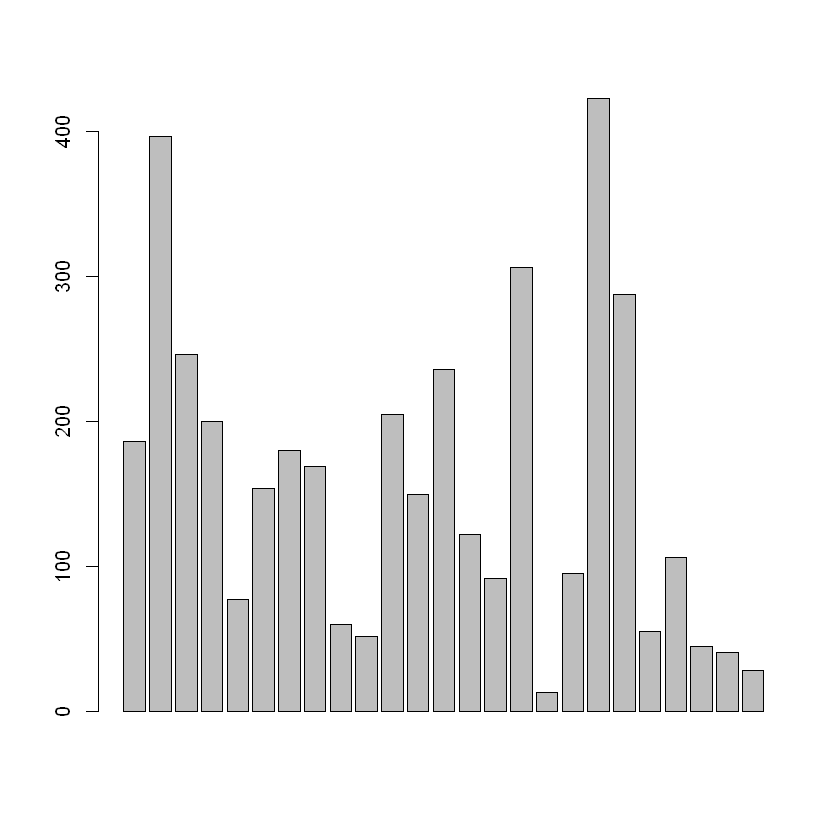

In [11]:
barplot(as.vector(start_freq))

Notice that words that start with p, b, or m are part of the top 6 most frequently acquired words by children.

# Plot 2

In [12]:
english_ws_admins <- get_administration_data("English (American)", "WS")

df <- get_instrument_data(language = "English (American)",
                                   form = "WS",
                                   administrations = english_ws_admins)

In [35]:
start_produce <-
  df %>%
  select(num_item_id, value, age, language) %>%
  filter(value == "produces") %>%
  inner_join(starting_sound, by = "num_item_id") %>%
  mutate(start = factor(start, letters))

In [39]:
mean_age <-
  start_produce %>%
  group_by(start) %>%
  summarize(mean = mean(age))

There does not to be any relationship with average age of acquisition based solely on the starting sound of a word.

In [53]:
head(arrange(mean_age, mean))

start,mean
z,24.58233
q,24.88203
b,24.88994
m,24.89724
v,24.91194
n,24.91305


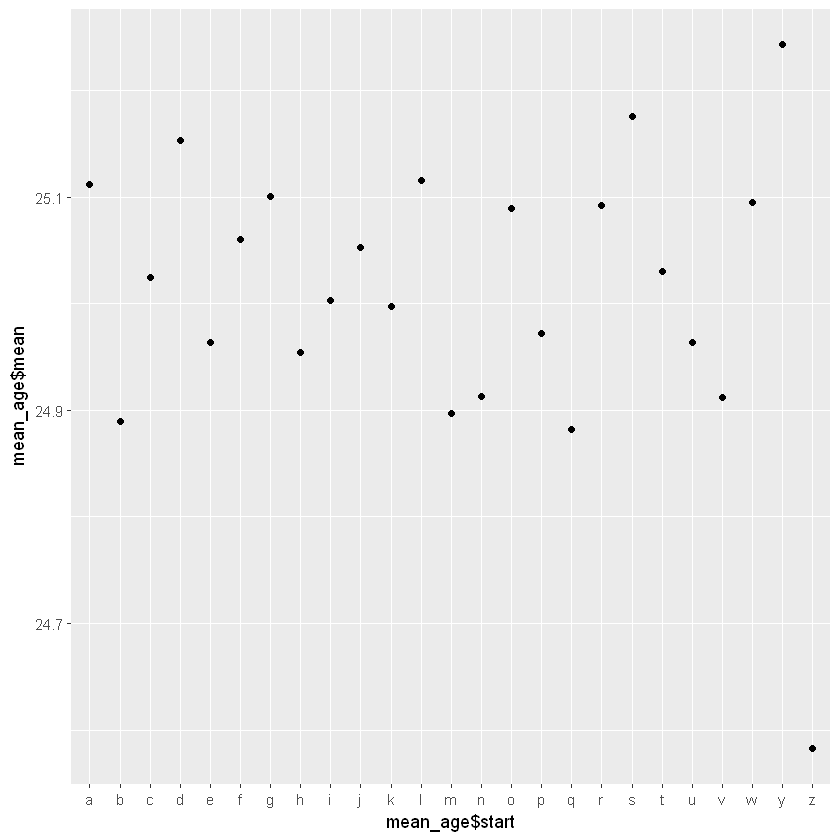

In [44]:
qplot(mean_age$start, mean_age$mean)